# Tarea 4
## Por Juan Pablo Morales Gomez

In [46]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import csv
import os

# usanado el template

In [108]:
desire_size = (50, 50)
n_channels = 3
batch_size = 128
labels = list(map(lambda x: x.split("\\")[1], glob.glob("data/train/*/*.png")))
IDS = list(map(lambda x: x.split("\\")[2] , glob.glob("data/train/*/*.png")))
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
num_out = len(le.classes_)
pd.Series(labels).value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [109]:
desire_size = (30,30)
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4750 files belonging to 12 classes.
Using 3800 files for training.
Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [110]:
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [111]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0005446258 0.69969493


In [112]:
num_classes = len(class_names)
img_height = 30
img_width = 30
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [113]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 30, 30, 3)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 64)         

                                                                 
 dense_12 (Dense)            (None, 12)                1548      
                                                                 
Total params: 98,988
Trainable params: 98,988
Non-trainable params: 0
_________________________________________________________________


In [116]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
 1/30 [>.............................] - ETA: 1s - loss: 0.2614 - accuracy: 0.9609

30/30 [==============================] - 2s 54ms/step - loss: 0.2657 - accuracy: 0.9153 - val_loss: 0.7265 - val_accuracy: 0.7832
Epoch 2/5
30/30 [==============================] - 2s 50ms/step - loss: 0.2621 - accuracy: 0.9192 - val_loss: 0.7189 - val_accuracy: 0.7853
Epoch 3/5
30/30 [==============================] - 2s 61ms/step - loss: 0.2572 - accuracy: 0.9195 - val_loss: 0.7510 - val_accuracy: 0.7821
Epoch 4/5
30/30 [==============================] - 2s 62ms/step - loss: 0.2502 - accuracy: 0.9182 - val_loss: 0.7912 - val_accuracy: 0.7695
Epoch 5/5
30/30 [==============================] - 2s 66ms/step - loss: 0.2679 - accuracy: 0.9111 - val_loss: 0.7508 - val_accuracy: 0.7832


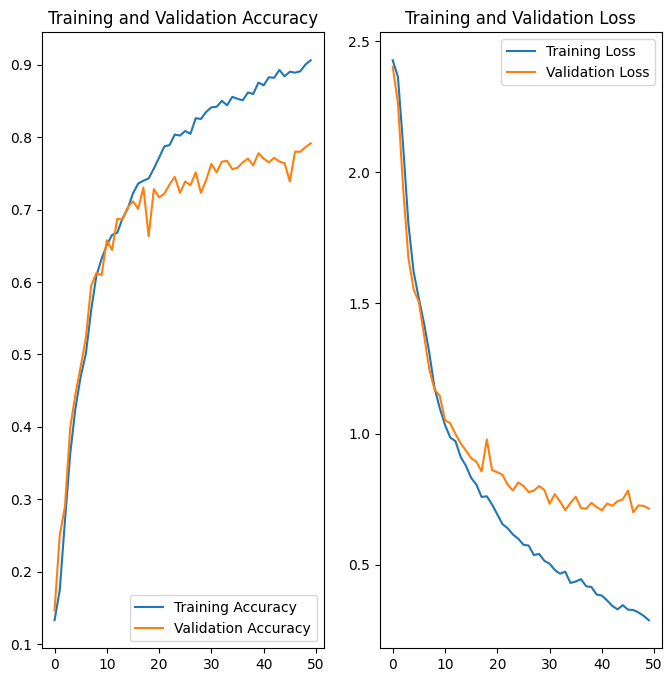

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [117]:
directory = './data/test'
dataset = []
label_mapping = {0: 'Black-grass', 1: 'Charlock',2: 'Cleavers',3: 'Common Chickweed',4: 'Common wheat',5: 'Fat Hen',6: 'Loose Silky-bent',7: 'Charlock',8: 'Maize',
                 9: 'Scentless Mayweed',10: 'Small-flowered Cranesbill',11: 'Sugar beet'}
for filename in os.listdir(directory):
    if filename.endswith('.png'):
        
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)
        image = image.resize((30, 30))  

        image = np.array(image)
        image = image / 255.0  
        image = np.expand_dims(image, axis=0)

        prediction = model.predict(image)
        predicted_label = np.argmax(prediction)
        
        transformed_label = label_mapping.get(predicted_label, '')
       
        dataset.append((image_path, predicted_label))


csv_filename = 'dataset_2.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['file', 'species'])
    writer.writerows(dataset)



1/1 [==============================] - 0s 35ms/step


In [118]:

transformed_data = []

with open(csv_filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  
    transformed_data.append(['file', 'species']) 

    for row in reader:
        image_path = row[0]
        label = int(row[1])

        image_filename = os.path.basename(image_path)

        transformed_label = label_mapping.get(label, '')

        transformed_data.append([image_filename, transformed_label])

new_csv_filename = 'transformed_dataset2.csv'
with open(new_csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transformed_data)

In [119]:
transformed_data = []
with open(csv_filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  
    transformed_data.append(['file', 'species']) 

    for row in reader:
        image_path = row[0]
        label = int(row[1])

        image_filename = os.path.basename(image_path)

        transformed_label = label_mapping.get(label, '')

        transformed_data.append([image_filename, transformed_label])

new_csv_filename = 'transformed_dataset2.csv'
with open(new_csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transformed_data)

# este es el intento del primero modelo

In [2]:
img_width, img_height = 196, 196
train_data_dir = './data/train'
validation_data_dir = './data/validation'
nb_train_samples =4750
nb_validation_samples = 1195
epochs = 10
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 4750 images belonging to 12 classes.
Found 1195 images belonging to 12 classes.


C:\Users\jmora\AppData\Local\Temp\ipykernel_35596\3119093969.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
296/296 [==============================] - 191s 640ms/step - loss: -256294400.0000 - accuracy: 0.0820 - val_loss: -1298627712.0000 - val_accuracy: 0.0845
Epoch 2/10
296/296 [==============================] - 181s 611ms/step - loss: -8547578880.0000 - accuracy: 0.0820 - val_loss: -23753689088.0000 - val_accuracy: 0.0819
Epoch 3/10
296/296 [==============================] - 178s 602ms/step - loss: -69431427072.0000 - accuracy: 0.0822 - val_loss: -143524806656.0000 - val_accuracy: 0.0811
Epoch 4/10
296/296 [==============================] - 183s 618ms/step - loss: -301852950528.0000 - accuracy: 0.0817 - val_loss: -527739748352.0000 - val_accuracy: 0.0828
Epoch 5/10
296/296 [==============================] - 191s 645ms/step - loss: -929587200000.0000 - accuracy: 0.0817 - val_loss: -1474298118144.0000 - val_accuracy: 0.0819
Epoch 6/10
296/296 [==============================] - 190s 641ms/step - loss: -2353806180352.0000 - accuracy: 0.0822 - val_loss: -3440121217024.0000 - val_acc

In [7]:
model.save_weights('model_saved.h5')

In [8]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import csv
import tensorflow as tf



In [10]:
directory = './data/test'
model_path = './model_saved.h5'
dataset = []

for filename in os.listdir(directory):
    if filename.endswith('.png'):
        
        image_path = os.path.join(directory, filename)
        image = Image.open(image_path)
        image = image.resize((196, 196))  

        image = np.array(image)
        image = image / 255.0  
        image = np.expand_dims(image, axis=0)

       
        prediction = model.predict(image)
        predicted_label = np.argmax(prediction)

       
        dataset.append((image_path, predicted_label))


csv_filename = 'dataset.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Label'])
    writer.writerows(dataset)



1/1 [==============================] - 0s 35ms/step
El conjunto de datos se ha guardado correctamente en dataset.csv


In [12]:
label_mapping = {0: 'Black-grass', 1: 'Charlock',1: 'Charlock',1: 'Charlock',1: 'Charlock',1: 'Charlock',1: 'Charlock',1: 'Charlock',1: 'Charlock',}

transformed_data = []

with open(csv_filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  
    transformed_data.append(['file', 'species']) 

    for row in reader:
        image_path = row[0]
        label = int(row[1])

        image_filename = os.path.basename(image_path)

        transformed_label = label_mapping.get(label, '')

        transformed_data.append([image_filename, transformed_label])

new_csv_filename = 'transformed_dataset.csv'
with open(new_csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transformed_data)